In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

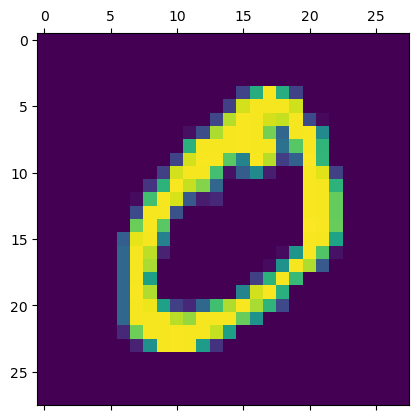

In [22]:
plt.matshow(x_train[1])

In [23]:
x_train_flattern = x_train.reshape(len(x_train), 28 * 28)
x_test_flattern = x_test.reshape(len(x_test), x_test[0].shape[0] * x_test[0].shape[0])
x_train_flattern = x_train_flattern / 255
x_test_flattern = x_test_flattern / 255

In [24]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
    ]
)
tb_callback = keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq=1)
model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train_flattern, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7112 - loss: 1.1352
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8735 - loss: 0.4812
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.4106
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8953 - loss: 0.3831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9023 - loss: 0.3562


In [25]:
model.evaluate(x_test_flattern, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8950 - loss: 0.3843   


[0.33588510751724243, 0.9092000126838684]

In [26]:
preds = model.predict(x_test_flattern)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


<Axes: >

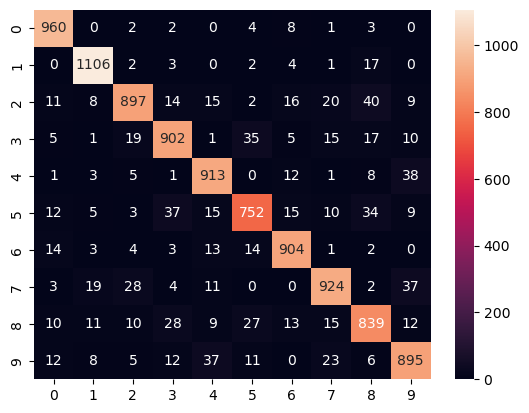

In [27]:
y_pred = np.argmax(preds, axis = 1)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')

In [28]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train_flattern, y_train, epochs = 5)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8694 - loss: 0.4556
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9619 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0647
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0495


In [29]:
model.evaluate(x_test_flattern, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.0822   


[0.07280050218105316, 0.9769999980926514]

In [30]:
preds = model.predict(x_test_flattern)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


<Axes: >

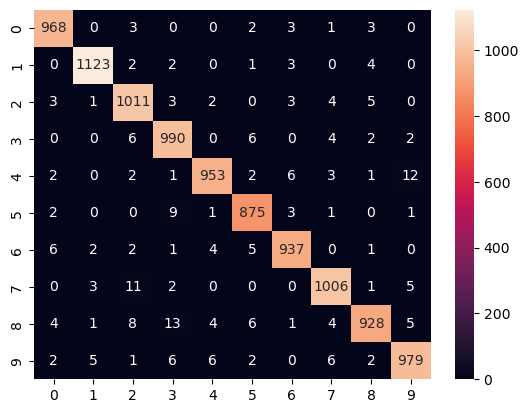

In [31]:
y_pred = np.argmax(preds, axis = 1)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')

In [32]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28, 28)),
        keras.layers.Dense(100, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5


/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4938 - loss: 7.7872 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5412 - loss: 0.4249
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4392 - loss: 0.3013
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3668 - loss: 0.2637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3460 - loss: 0.2247


In [33]:
revice multivariate linear regression
revice and implement gradiant decent
revice logistic regression and the cost function
revice multivariate and softmax regression maths and cost function implement it

SyntaxError: invalid syntax (3629508565.py, line 1)